In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
img1=cv2.imread('1.jpg')

In [5]:
sift_d=cv2.SIFT_create()
orb_d=cv2.ORB_create()
surf_d=cv2.xfeatures2d.SURF()

In [7]:
kp1,des1=sift_d.detectAndCompute(img1,None)

In [8]:
kp1

(< cv2.KeyPoint 000001B87DE00420>,
 < cv2.KeyPoint 000001B87DE02BB0>,
 < cv2.KeyPoint 000001B87DD90A80>,
 < cv2.KeyPoint 000001B87DE19020>,
 < cv2.KeyPoint 000001B87DE198C0>,
 < cv2.KeyPoint 000001B87DE1A310>,
 < cv2.KeyPoint 000001B87DE1BDB0>,
 < cv2.KeyPoint 000001B87DE1BA20>,
 < cv2.KeyPoint 000001B87DE1BEA0>,
 < cv2.KeyPoint 000001B80E0DEA90>,
 < cv2.KeyPoint 000001B80E0DDCB0>,
 < cv2.KeyPoint 000001B80E0DE7C0>,
 < cv2.KeyPoint 000001B80E0DE3D0>,
 < cv2.KeyPoint 000001B80E0DE010>,
 < cv2.KeyPoint 000001B80E0DE9D0>,
 < cv2.KeyPoint 000001B80E0DDAA0>,
 < cv2.KeyPoint 000001B80E0DDD10>,
 < cv2.KeyPoint 000001B80E0DE6A0>,
 < cv2.KeyPoint 000001B80E0DD770>,
 < cv2.KeyPoint 000001B80E0DE070>,
 < cv2.KeyPoint 000001B80E0DE0D0>,
 < cv2.KeyPoint 000001B80E0DEB50>,
 < cv2.KeyPoint 000001B80E0DE940>,
 < cv2.KeyPoint 000001B80E0DE910>,
 < cv2.KeyPoint 000001B80E0DE790>,
 < cv2.KeyPoint 000001B80E0DEBE0>,
 < cv2.KeyPoint 000001B80E0DEAF0>,
 < cv2.KeyPoint 000001B80E0DEC10>,
 < cv2.KeyPoint 0000

In [9]:
len(kp1)

4277

In [10]:
img2=cv2.imread('2.jpg')
kp2,des2=sift_d.detectAndCompute(img2,None)
len(kp2)

28395

In [12]:
kp10=kp1[0]
kp10.size

3.172502279281616

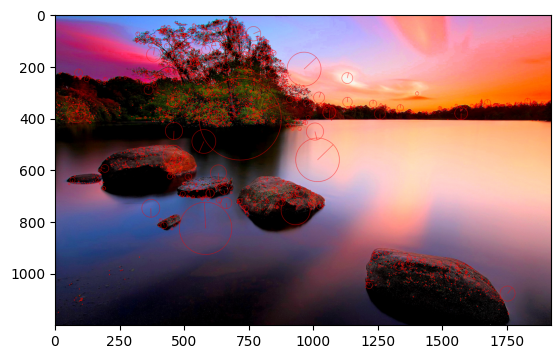

In [13]:
img1_kp=cv2.drawKeypoints(img1,kp1,0,(0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img1_kp[:,:,::-1])

In [14]:
cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS

4

In [15]:
len(kp1)

4277

In [16]:
des1.shape

(4277, 128)

In [17]:
matcher=cv2.BFMatcher()

In [18]:
matches=matcher.knnMatch(des1,des2,k=2)
matches

((< cv2.DMatch 000001B80E0E4610>, < cv2.DMatch 000001B80E591610>),
 (< cv2.DMatch 000001B80E5930D0>, < cv2.DMatch 000001B80E592410>),
 (< cv2.DMatch 000001B80E5931B0>, < cv2.DMatch 000001B80E591CB0>),
 (< cv2.DMatch 000001B80E591E50>, < cv2.DMatch 000001B80E5925F0>),
 (< cv2.DMatch 000001B80E5930B0>, < cv2.DMatch 000001B80E593190>),
 (< cv2.DMatch 000001B80E591A50>, < cv2.DMatch 000001B80E591650>),
 (< cv2.DMatch 000001B80E5921B0>, < cv2.DMatch 000001B80E591DD0>),
 (< cv2.DMatch 000001B80E591C90>, < cv2.DMatch 000001B80E5931F0>),
 (< cv2.DMatch 000001B80E593210>, < cv2.DMatch 000001B80E593230>),
 (< cv2.DMatch 000001B80E593250>, < cv2.DMatch 000001B80E593270>),
 (< cv2.DMatch 000001B80E593290>, < cv2.DMatch 000001B80E5932B0>),
 (< cv2.DMatch 000001B80E5932D0>, < cv2.DMatch 000001B80E5932F0>),
 (< cv2.DMatch 000001B80E593310>, < cv2.DMatch 000001B80E593330>),
 (< cv2.DMatch 000001B80E593350>, < cv2.DMatch 000001B80E593370>),
 (< cv2.DMatch 000001B80E593390>, < cv2.DMatch 000001B80E5933B

In [19]:
len(matches)

4277

In [20]:
count=0
for m1,m2 in matches:
    print(m1.distance,m2.distance)

280.8077697753906 283.4695739746094
292.2498779296875 312.1233825683594
273.7572021484375 276.86279296875
265.8495788574219 267.837646484375
287.72381591796875 293.04095458984375
269.01300048828125 269.0408935546875
293.70391845703125 298.33538818359375
294.24310302734375 296.1840515136719
314.4630432128906 327.0749206542969
238.57913208007812 239.88539123535156
310.1934814453125 316.4980163574219
319.7154846191406 323.3836669921875
280.7952880859375 320.1374816894531
290.527099609375 307.2214050292969
102.85912322998047 159.00942993164062
300.1882629394531 311.759521484375
301.589111328125 304.5455627441406
132.47264099121094 142.4745635986328
259.6593933105469 267.0449523925781
275.8278503417969 282.2746887207031
293.8179626464844 304.1825256347656
254.00787353515625 263.78399658203125
282.23394775390625 285.15435791015625
292.2567443847656 306.7751770019531
285.6658935546875 291.76873779296875
303.0165100097656 303.2095031738281
302.15228271484375 304.8704528808594
281.4196166992187

In [22]:
count=0
for m1,m2 in matches:
    gap=abs(m1.distance-m2.distance)
    if gap<20:
        count=count+1
print(count,len(matches))        

3570 4277


In [23]:
100*3570/4277

83.46972176759411